# Редактируем DataSet для обучения модели

### Импортируем нужные библиотеки

In [86]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

### Читаем DataSet и записываем его в две переменные

In [129]:
df = pd.read_csv("archive/Final_data.csv")
fd = pd.read_csv("archive/Final_data.csv")

### Создаем .db файл - базу данных, в котором будет храниться DataSet

In [130]:
con = sqlite3.connect("test.db")
df.to_sql("user", con=con, if_exists="append", index=False)

20000

In [131]:
pd.read_sql('''
    SELECT *
    FROM user
''', con)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
39996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
39997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
39998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


### Проверяем DataSet на пропуски и NaN

In [132]:
df.isna().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

### Приводим все данные в числовому типу и удаляем не нужные столбцы со слишком большим количеством уникальных не числовых значений

In [133]:
df["meal_name"].unique()

array(['Other'], dtype=object)

In [134]:
df = df.drop("meal_name", axis = 1)

In [135]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [136]:
df["Gender"]

0        0
1        1
2        1
3        1
4        0
        ..
19995    1
19996    1
19997    0
19998    0
19999    0
Name: Gender, Length: 20000, dtype: int64

In [137]:
df["Workout_Type"].unique()

array(['Strength', 'HIIT', 'Cardio', 'Yoga'], dtype=object)

In [138]:
df["Workout_Type"] = df["Workout_Type"].map({"Strength": 0, "HIIT": 1, "Cardio": 2, "Yoga": 3})

In [139]:
df["meal_type"].unique()

array(['Lunch', 'Breakfast', 'Snack', 'Dinner'], dtype=object)

In [140]:
df["meal_type"] = df["meal_type"].map({"Lunch": 0, "Breakfast": 1, "Snack": 2, "Dinner": 3})

In [141]:
df["diet_type"].unique()

array(['Vegan', 'Vegetarian', 'Paleo', 'Keto', 'Low-Carb', 'Balanced'],
      dtype=object)

In [142]:
df["diet_type"] = df["diet_type"].map({"Vegan": 0, "Vegetarian": 1, "Paleo": 2, "Keto": 3, "Low-Carb": 4, "Balanced": 5})

In [143]:
df["cooking_method"].unique()

array(['Grilled', 'Fried', 'Boiled', 'Baked', 'Steamed', 'Raw', 'Roasted'],
      dtype=object)

In [144]:
df["cooking_method"] = df["cooking_method"].map({"Grilled": 0, "Fried": 1, "Boiled": 2, "Baked": 3, "Steamed": 4, "Raw": 5, "Roasted": 6})

In [145]:
df["Name of Exercise"].unique()

array(['Decline Push-ups', 'Bear Crawls', 'Dips', 'Mountain Climbers',
       'Bicep Curls', 'Leg Press', 'Thrusters', 'Turkish Get-ups',
       'Glute Bridges', 'Step-ups', 'Plank', 'Pull-ups', 'Lunges',
       'Plyo Squats', 'Squats', 'Frog Jumps', 'Deadlifts', 'Prone Cobras',
       'Lat Pulldowns', 'Russian Twists', 'Shoulder Press', 'Tricep Dips',
       'Kettlebell Swings', 'Resistance Band Pull-Aparts', 'Leg Raises',
       'Tricep Extensions', 'Dead Bugs', 'Scissors Kicks',
       'Plyometric Push-ups', 'Push Ups', 'Bench Press', 'Inverted Rows',
       'Seated Rows', 'Calf Raises', 'Reverse Lunges', 'Deadlift',
       'Wall Angels', 'Lateral Raises', 'Face Pulls', 'Burpees',
       'Push-ups', 'Box Jumps', 'Rows', 'Bird Dogs', 'Dragon Flags',
       'Bicycle Crunches', 'Flutter Kicks', 'Bulgarian Split Squats',
       'Superman', 'Incline Push-ups', 'Jumping Jacks', 'Renegade Rows',
       'Windshield Wipers', 'Zottman Curls', 'Pistol Squats'],
      dtype=object)

In [146]:
df = df.drop("Name of Exercise", axis = 1)

In [147]:
df["Benefit"].unique()

array(['Improves shoulder health and posture', 'Strengthens lower abs',
       'Builds chest strength',
       'Improves coordination and cardiovascular health',
       'Targets obliques and improves core rotation',
       'Builds explosive power', 'Strengthens back and improves posture',
       'Improves core stability and upper body strength',
       'Full body workout', 'Strengthens lower body', 'Isolates triceps',
       'Builds unilateral leg strength and balance',
       'Improves core stability', 'Improves core stability and balance',
       'Improves balance and leg strength',
       'Improves posture and strengthens upper back',
       'Isolates and strengthens triceps', 'Targets upper chest',
       'Strengthens back and legs',
       'Improves shoulder mobility and posture',
       'Builds upper body strength', 'Builds shoulder width',
       'Advanced core exercise', 'Targets biceps and forearms',
       'Improves lower back strength',
       'Strengthens core and improves 

In [148]:
df = df.drop("Benefit", axis = 1)

In [149]:
df["Target Muscle Group"].unique()

array(['Shoulders, Triceps', 'Back, Core, Shoulders',
       'Quadriceps, Glutes', 'Biceps, Forearms', 'Chest, Triceps',
       'Core, Obliques', 'Core', 'Back, Biceps', 'Upper Chest, Triceps',
       'Core, Lower Back', 'Lower Chest, Triceps',
       'Core, Shoulders, Hips', 'Rear Deltoids, Upper Back',
       'Quadriceps, Hamstrings, Glutes', 'Core, Shoulders, Legs',
       'Shoulders, Upper Back', 'Chest, Triceps, Shoulders', 'Triceps',
       'Obliques, Core', 'Full Body', 'Glutes, Hamstrings',
       'Quadriceps, Calves, Glutes', 'Lower Abs', 'Legs, Shoulders, Core',
       'Shoulders', 'Upper Back, Rear Deltoids', 'Calves',
       'Glutes, Hamstrings, Core', 'Triceps, Chest',
       'Back, Hamstrings, Glutes', 'Lower Back, Glutes',
       'Lower Abs, Hip Flexors', 'Full Body, Core, Shoulders',
       'Full Core', 'Quadriceps', 'Legs, Core'], dtype=object)

In [150]:
df = df.drop("Target Muscle Group", axis = 1)

In [151]:
df["Equipment Needed"].unique()

array(['Cable Machine', 'Step or Box', 'Parallel Bars or Chair', 'Wall',
       'Resistance Band or Cable Machine', 'None or Dumbbells',
       'Pull-up Bar', 'Barbell', 'Low Bar or TRX', 'Dumbbells',
       'Bench or Sturdy Surface', 'Bench or Step',
       'Cable Machine or Resistance Band', 'Bench or Chair',
       'Bench, Barbell', 'Kettlebell', 'Resistance Band',
       'Box or Platform', 'Dumbbells or Barbell', 'None or Dumbbell'],
      dtype=object)

In [152]:
df = df.drop("Equipment Needed", axis = 1)

In [155]:
df["Difficulty Level"].unique()

array([0, 1, 2])

In [154]:
df["Difficulty Level"] = df["Difficulty Level"].map({"Advanced": 0, "Intermediate": 1, "Beginner": 2})

In [160]:
df["Body Part"] = fd["Body Part"]

In [164]:
df["Body Part"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [162]:
df["Body Part"] = df["Body Part"].map({"Legs": 0, "Chest": 1, "Arms": 2, "Shoulders": 3, "Abs": 4, "Back": 5, "Forearms": 6})

In [163]:
df["Difficulty Level"].unique()

array([0, 1, 2])

In [54]:
df["Workout"].unique()

array(['Dumbbell flyes', 'Lateral raises', 'Standing calf raises',
       'Incline dumbbell flyes', 'Military press', 'Skull crushers',
       'Barbell rows', 'Hammer curl', 'Russian twists', 'Towel pull-up',
       'Bicep Curls', 'Face pulls', 'Seated calf raises',
       'Fat grip dumbbell curl', 'Hammer curls', 'Plate pinch',
       'Donkey kicks', 'Decline dumbbell press', 'Barbell curls',
       'Dumbbell front raises', 'Hyperextensions', 'Leg raises',
       'Bicycle crunches', 'Close-grip bench press',
       'Decline cable crossovers', 'Hanging leg raises', 'Bird dog',
       'Dumbbell rows', 'Incline dumbbell press',
       'Bent-over lateral raises', 'Leg extensions', 'Pull-ups',
       'Crunches', 'Chest flyes', 'Decline dumbbell flyes',
       'Dumbbell curls', 'Barbell squats', 'Leg curls', 'Triceps dips',
       'Concentration curls', 'Wrist extension', 'Preacher curls',
       'Incline cable crossovers', 'Barbell hip thrusts',
       'Cable crossovers', 'Romanian deadlif

In [165]:
df = df.drop("Workout", axis = 1)

In [168]:
df["Burns_Calories_Bin"].unique()

array([0, 1, 2, 3])

In [167]:
df["Burns_Calories_Bin"] = df["Burns_Calories_Bin"].map({"Medium": 0, "High": 1, "Low": 2, "Very High": 3})

In [176]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,0,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,0,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,0
1,23.37,1,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,1,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,1
2,33.20,1,58.98,1.67,175.04,123.95,54.96,0.91,802.26,2,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,1
3,38.69,1,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,1,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,1
4,45.09,0,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,0,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,2
5,53.19,1,105.05,1.84,176.52,130.60,61.84,0.69,453.33,3,...,1369.66,0.498985,0.646549,0.599581,0.739860,2313.67,71.382458,516.8928,1.505159e+20,3
6,23.17,0,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,0,...,2245.45,0.499374,1.923472,0.654016,0.762652,-86.90,46.408911,1098.6596,5.210106e+19,2
7,55.92,1,84.07,1.63,183.87,141.12,51.79,1.01,727.81,3,...,2105.25,0.498886,1.253836,0.676333,0.767499,1463.19,57.093470,734.3912,1.179846e+20,3
8,24.11,1,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,0,...,1383.27,0.500495,0.783924,0.796487,0.871535,524.63,64.338094,1230.2752,8.550761e+19,1
9,39.19,1,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,0,...,1527.67,0.500265,1.525437,0.667949,0.767258,89.75,39.295200,763.5654,4.879494e+19,2


In [73]:
df["Type of Muscle"].unique()

array(['Lats', 'Grip Strength', 'Upper', 'Wrist Flexors', 'Lower',
       'Middle', 'Lower Chest', 'Triceps', 'Quads', 'Anterior',
       'Posterior', 'Wrist Extensors', 'Lateral'], dtype=object)

In [169]:
df = df.drop("Type of Muscle", axis = 1)

### Начинаем строить матрицу корелляции

In [211]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min',
       'cook_time_min', 'rating', 'Sets', 'Reps',
       'Burns Calories (per 30 min)', 'Difficulty Level', 'Body Part',
       'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR',
       'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [218]:
cor1 = df.columns[15:30]

In [219]:
cor1

Index(['Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min',
       'cook_time_min'],
      dtype='object')

In [220]:
cor1 = df[cor1]

In [221]:
cor1

,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min
0,2.99,0.01,267.68,106.05,71.63,1806.0,0,0,31.77,1729.94,285.05,120.47,0,16.24,110.79
1,3.01,0.97,214.32,85.41,56.97,1577.0,0,1,12.34,693.08,300.61,109.15,1,16.47,12.01
2,1.99,-0.02,246.04,98.11,65.48,1608.0,1,2,42.81,2142.48,215.42,399.43,2,54.35,6.09
3,3.00,0.04,203.22,80.84,54.56,2657.0,0,2,9.34,123.20,9.70,314.31,1,27.73,103.72
4,3.00,3.00,332.79,133.05,88.43,1470.0,1,0,23.78,1935.11,116.89,99.22,3,34.16,46.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.03,0.00,235.35,93.87,62.88,2627.0,1,4,32.98,1241.30,243.54,190.52,2,41.69,91.78
19996,2.97,-0.03,149.77,60.72,40.39,2477.0,2,1,32.17,1853.10,188.76,468.81,2,20.80,12.98
19997,3.00,-0.01,243.61,97.29,64.91,1425.0,2,3,14.48,1808.43,80.47,244.51,0,23.04,61.14
19998,2.00,1.00,240.16,97.05,63.63,1276.0,2,2,13.68,2125.57,245.91,402.26,6,39.25,99.85


In [222]:
cor1 = cor1.corr()

In [223]:
cor1

,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min
Daily meals frequency,1.000000,-0.000137,0.127073,0.126989,0.126942,0.046161,0.007847,-0.000855,0.038438,0.010419,0.009165,0.031263,-0.004548,0.036234,-0.039980
Physical exercise,-0.000137,1.000000,0.644091,0.644027,0.643949,0.034065,0.009924,0.014626,0.069430,0.013760,-0.058773,0.022047,-0.007409,-0.017397,-0.026348
Carbs,0.127073,0.644091,1.000000,0.999595,0.999605,0.020671,0.011740,0.014869,0.065461,0.014596,-0.046175,0.019326,-0.012198,0.008638,0.005709
Proteins,0.126989,0.644027,0.999595,1.000000,0.999608,0.020726,0.011625,0.015176,0.065597,0.014723,-0.046091,0.019493,-0.012468,0.008582,0.005567
Fats,0.126942,0.643949,0.999605,0.999608,1.000000,0.020590,0.011484,0.015082,0.065713,0.014646,-0.046193,0.019374,-0.012336,0.008452,0.005589
Calories,0.046161,0.034065,0.020671,0.020726,0.020590,1.000000,0.008591,0.002107,0.000019,-0.017674,0.020545,0.041314,-0.002694,-0.020448,-0.043777
meal_type,0.007847,0.009924,0.011740,0.011625,0.011484,0.008591,1.000000,-0.005543,0.010257,0.000569,0.000654,0.007801,0.006265,0.000116,0.004605
diet_type,-0.000855,0.014626,0.014869,0.015176,0.015082,0.002107,-0.005543,1.000000,0.006087,0.017328,-0.006469,-0.016490,-0.004049,-0.002936,-0.005239
sugar_g,0.038438,0.069430,0.065461,0.065597,0.065713,0.000019,0.010257,0.006087,1.000000,-0.020454,-0.026744,-0.004609,0.005526,-0.028722,-0.056086
sodium_mg,0.010419,0.013760,0.014596,0.014723,0.014646,-0.017674,0.000569,0.017328,-0.020454,1.000000,0.010748,-0.018032,0.002770,-0.041743,-0.057500


<Axes: >

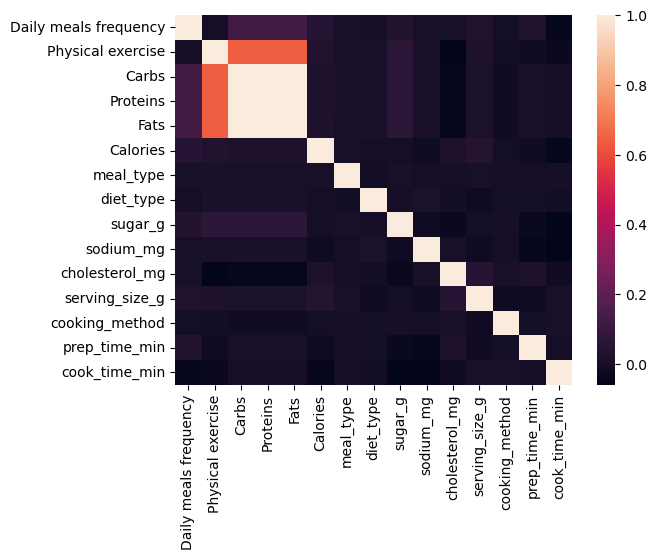

In [224]:
sb.heatmap(cor1)

### Построили матрицу корелляции, на которой видно, что на переменную "Physical exercise" сильно влияют три другие переменные: "Carbs", "Proteins", "Fats". Так же видно, что переменные "sugar_g", "Calories", "sodium_mg", "serving_size_g" и "cooking_method" тоже влияют на переменную "Physical exercise", но не на столько сильно. Такие переменные как "meal_type", "diet_type", "cholesterol_mg", "pred_time_min" и "cook_time_min" практически не влияют на нужную нам переменную.

### Удаляем не нежные столбцы, крирпые менее всего влияют на "Physical exercise"

In [232]:
cor2 = df.columns[15:30]

In [233]:
cor2 = df[cor2]

In [236]:
cor2 = cor2.corr()

<Axes: >

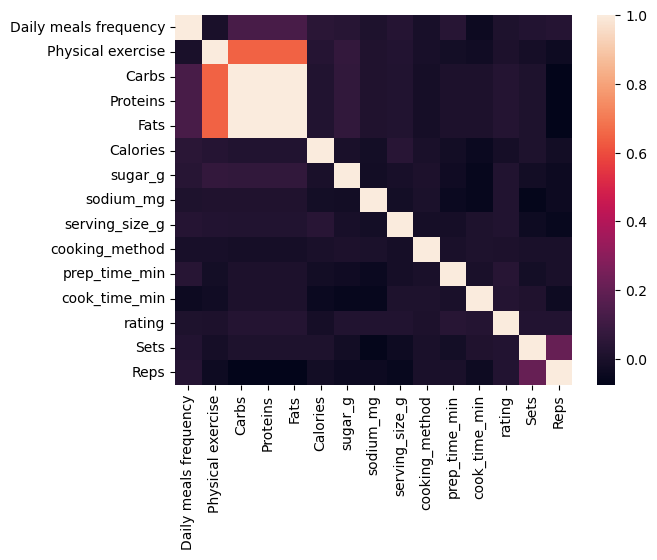

In [238]:
sb.heatmap(cor2)

In [239]:
df = df.drop("Reps", axis = 1)

In [241]:
df = df.drop("Daily meals frequency", axis = 1)

In [248]:
cor3 = df.columns[15:40]

In [249]:
cor3 = df[cor3]

In [250]:
cor3 = cor3.corr()

<Axes: >

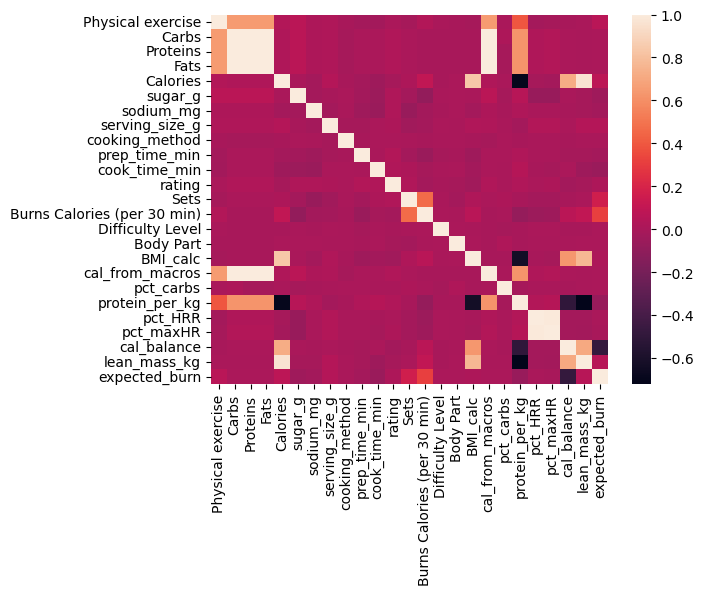

In [251]:
sb.heatmap(cor3)

In [252]:
df = df.drop(["lean_mass_kg", "cal_balance"], axis = 1)

In [253]:
df = df.drop(["pct_maxHR", "pct_carbs", "BMI_calc", "Body Part", "Difficulty Level", "Sets", "cook_time_min", "prep_time_min", "sodium_mg"], axis = 1)

In [258]:
df["Physical exercise"]

0        0.01
1        0.97
2       -0.02
3        0.04
4        3.00
         ... 
19995    0.00
19996   -0.03
19997   -0.01
19998    1.00
19999   -0.01
Name: Physical exercise, Length: 20000, dtype: float64

In [261]:
cor4 = df[df.columns[:20]].corr()

<Axes: >

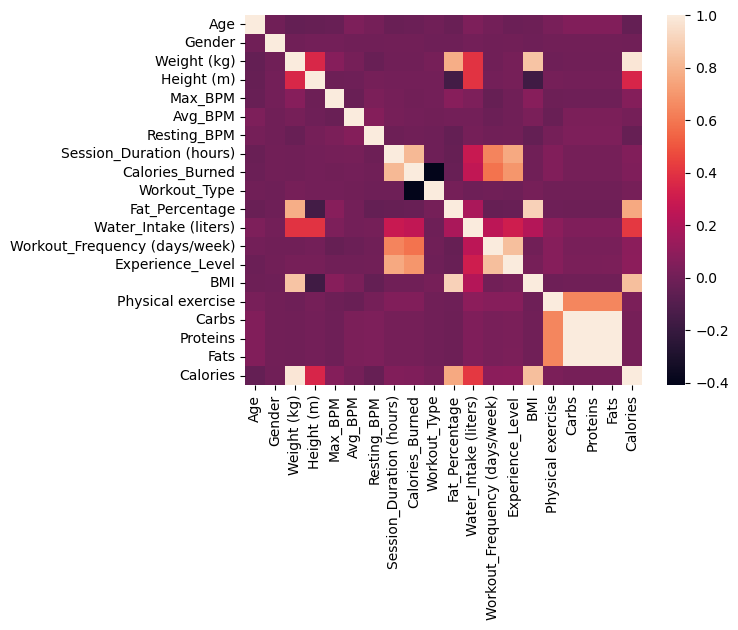

In [262]:
sb.heatmap(cor4)

In [269]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g',
       'serving_size_g', 'cooking_method', 'rating',
       'Burns Calories (per 30 min)', 'cal_from_macros', 'protein_per_kg',
       'pct_HRR', 'expected_burn', 'Burns Calories (per 30 min)_bc',
       'Burns_Calories_Bin'],
      dtype='object')

In [270]:
df = df.drop(["Calories_Burned", "Avg_BPM"], axis = 1)

In [280]:
cor5 = df[df.columns[10:20]].corr()

<Axes: >

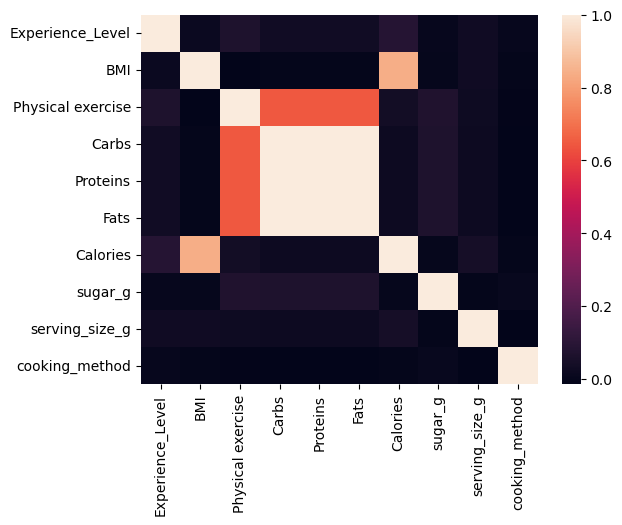

In [281]:
sb.heatmap(cor5)

In [282]:
df = df.drop(["BMI", "cooking_method"], axis = 1)

In [283]:
cor6 = df[df.columns[5:20]].corr()

<Axes: >

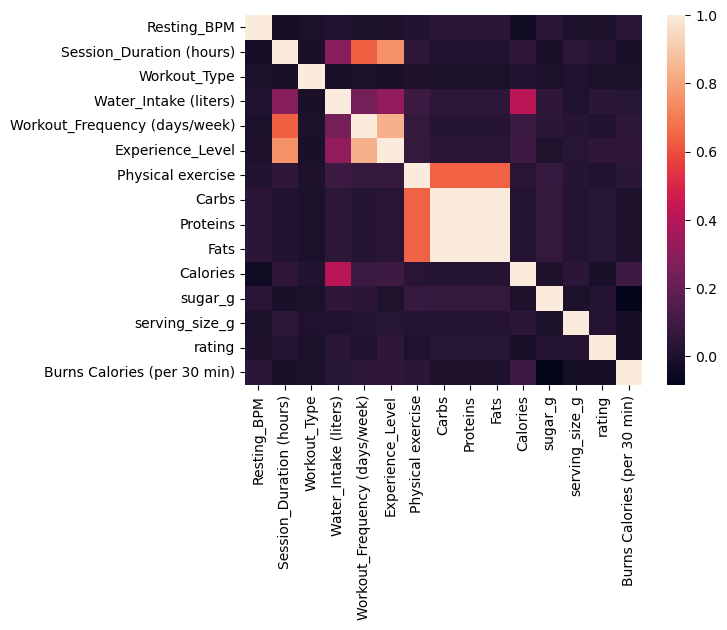

In [284]:
sb.heatmap(cor6)

In [285]:
df = df.drop(["rating", ], axis = 1)

In [286]:
df = df.drop(["Workout_Type", "serving_size_g"], axis = 1)

In [287]:
cor6 = df[df.columns[:20]].corr()

<Axes: >

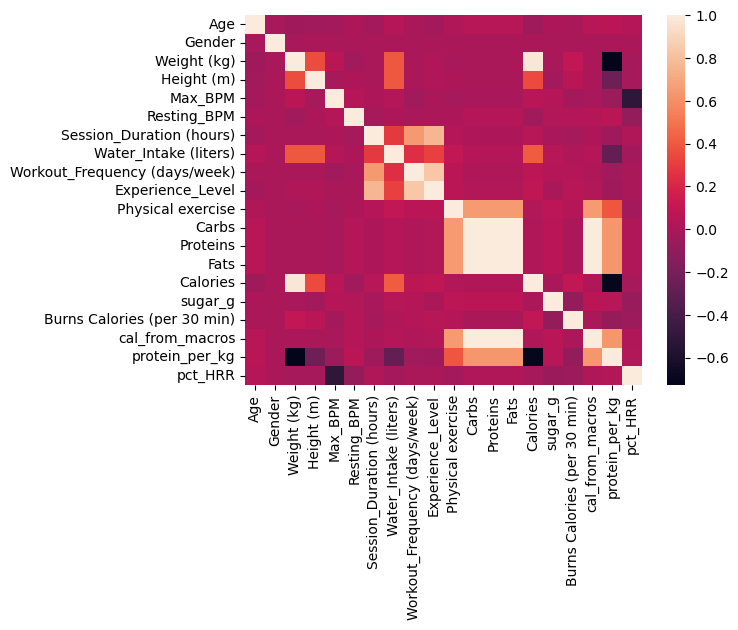

In [289]:
sb.heatmap(cor6)

In [290]:
df = df.drop(["pct_HRR", "Max_BPM"], axis = 1)

In [297]:
cor6 = df.corr()

<Axes: >

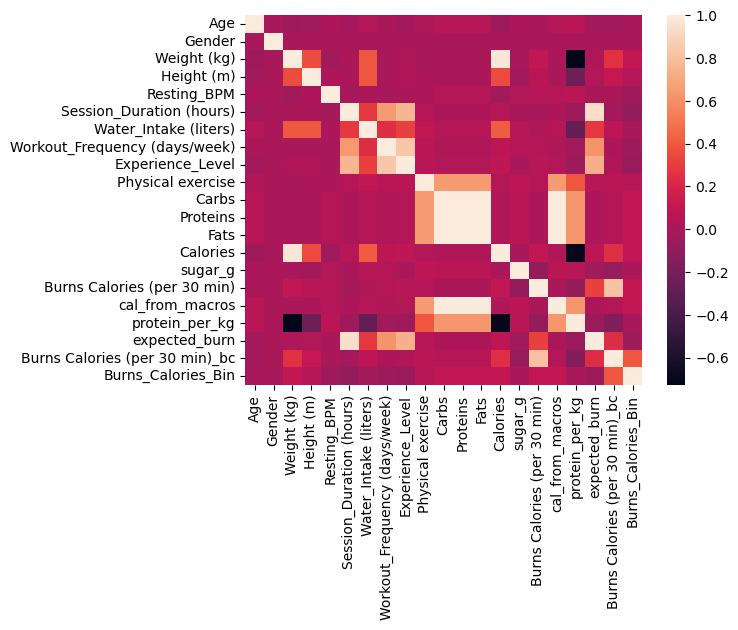

In [298]:
sb.heatmap(cor6)

In [299]:
df = df.drop(["Weight (kg)", "Height (m)"], axis = 1)

In [301]:
df = df.drop(["Session_Duration (hours)"], axis = 1)

In [310]:
cor7 = df.corr()

<Axes: >

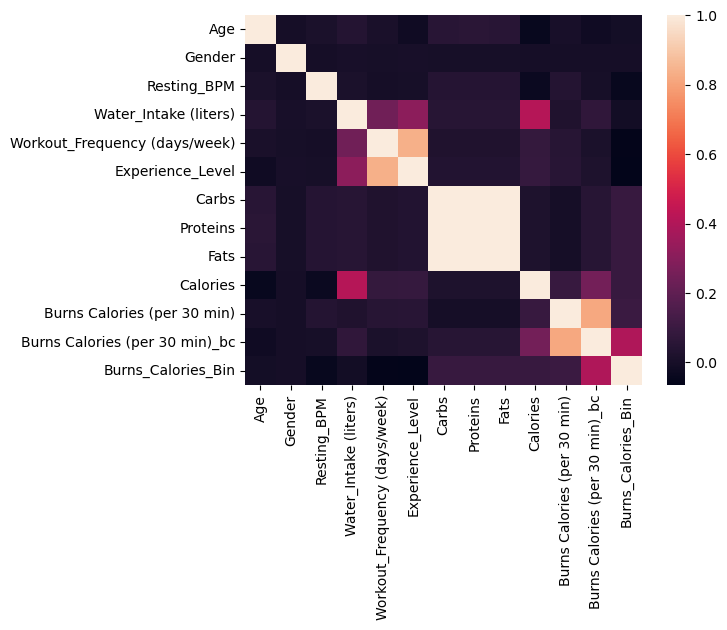

In [311]:
sb.heatmap(cor7)

In [308]:
df.insert(len(df.columns), "Physical exercise", df.pop("Physical exercise"))

KeyError: 'Physical exercise'

In [312]:
df["Physical exercise"] = fd["Physical exercise"]

In [313]:
df

,Age,Gender,Resting_BPM,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,Carbs,Proteins,Fats,Calories,Burns Calories (per 30 min),Burns Calories (per 30 min)_bc,Burns_Calories_Bin,Physical exercise
0,34.91,0,69.05,1.50,3.99,2.01,267.68,106.05,71.63,1806.0,342.58,7.260425e+19,0,0.01
1,23.37,1,73.18,1.90,4.00,2.01,214.32,85.41,56.97,1577.0,357.16,1.020506e+20,1,0.97
2,33.20,1,54.96,1.88,2.99,1.02,246.04,98.11,65.48,1608.0,359.63,1.079607e+20,1,-0.02
3,38.69,1,50.07,2.50,3.99,1.99,203.22,80.84,54.56,2657.0,351.65,8.987921e+19,1,0.04
4,45.09,0,70.84,2.91,4.00,2.00,332.79,133.05,88.43,1470.0,329.36,5.264685e+19,2,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,1,63.72,2.99,3.02,1.00,235.35,93.87,62.88,2627.0,346.27,7.924402e+19,0,0.00
19996,40.38,1,54.04,3.52,5.01,2.99,149.77,60.72,40.39,2477.0,332.64,5.708474e+19,2,-0.03
19997,50.31,0,61.65,2.81,4.02,2.00,243.61,97.29,64.91,1425.0,352.19,9.101285e+19,1,-0.01
19998,52.36,0,60.88,1.59,3.02,1.00,240.16,97.05,63.63,1276.0,329.22,5.246436e+19,2,1.00


### Смотрим итоговую таблицу корелляции

In [314]:
cor10 = df.corr()

<Axes: >

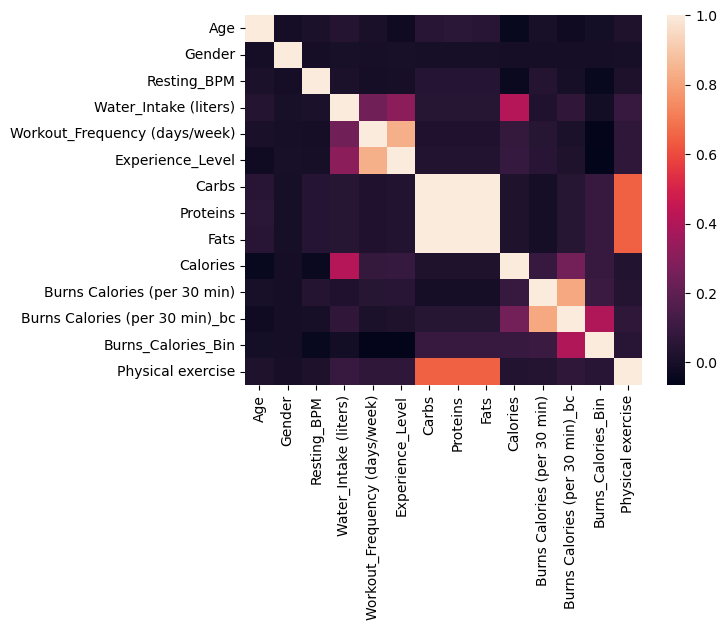

In [315]:
sb.heatmap(cor10)

### Сохраняем новый чистый DataSet в формат .csv

In [320]:
df.to_csv('new_table.csv')

### Сохраняем ее в файл базы данных

In [321]:
con = sqlite3.connect("new_table_database.db")
df.to_sql("user", con=con, if_exists="append", index=False)

20000

### Редактируем уже заранее созданную информационную таблицу

In [327]:
inf_table = pd.read_csv('Информационная таблица.csv')

In [333]:
inf_table = inf_table.drop(columns=inf_table.columns[len(inf_table.columns)-1])

In [334]:
inf_table

,Нзавание столбца,Расшифровка,Описание,Тип данных,Система измерения
0,Age,Возраст,Возраст участника,Числовой,Года
1,Gender,Пол,Пол участника,Числовой,-
2,Resting_BPM,Частота ударов сердца во время отдыха,Измерьте частоту сердечных сокращений в состоя...,Числовой,Удары в минуту
3,Water_Intake (liters),Количество потребляемой воды,Среднесуточное потребление воды,Числовой,Литры
4,Workout_Frequency (days/week),Частота тренеровок,Количество тренировочных дней в неделю,Числовой,Дни
5,Experience_Level,Опыт,Уровень физической подготовки,Числовой,-
6,Carbs,Углеводы,Ежедневное потребление углеводов,Числовой,Граммы
7,Proteins,Белки,Ежедневное потребление белков,Числовой,Граммы
8,Fats,Жиры,Ежедневное потребление жиров,Числовой,Граммы
9,Calories,Калории,Общее ежедневное потребление калорий с пищей,Числовой,-


### Сохраняем отредактированную информационную таблицу

In [335]:
inf_table.to_csv("Информационная таблица.csv")

# Создаем информационные графики по DataSet

### Гистограмма по взрасту людей

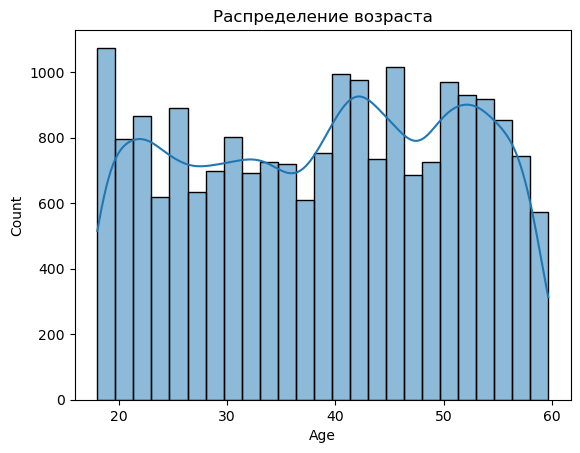

In [31]:
sb.histplot(df['Age'], bins=25, kde=True)
plt.title('Распределение возраста')
plt.show()

### Гистограмма по трате калорий за 30 минут

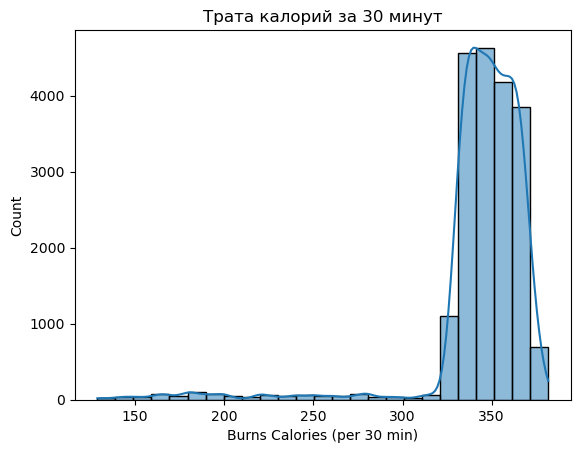

In [37]:
sb.histplot(df['Burns Calories (per 30 min)'], bins=25, kde=True)
plt.title('Трата калорий за 30 минут')
plt.show()

### Круговая диограмма возрастов

([<matplotlib.patches.Wedge at 0x20beaf40b90>,
 [Text(-0.004838081895660122, 1.0999893603865316, 'Female'),
  Text(0.004838178059787963, -1.0999893599635688, 'Male')],
 [Text(-0.002638953761269157, 0.5999941965744717, '50.1%'),
  Text(0.0026390062144297974, -0.5999941963437648, '49.9%')])

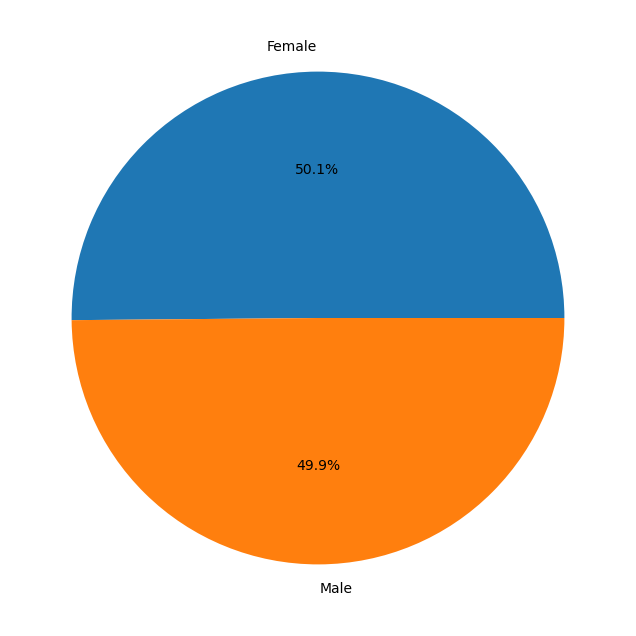

In [34]:
plt.figure(figsize = (8, 8))
plt.pie(df["Gender"].value_counts(), labels = ["Female", "Male"], autopct = "%1.1f%%")

### Точечная диаграмма зависимости возраста и физ.упражнениями

Text(0.5, 1.0, 'Зависимость между возрастом и физическими упражнениями')

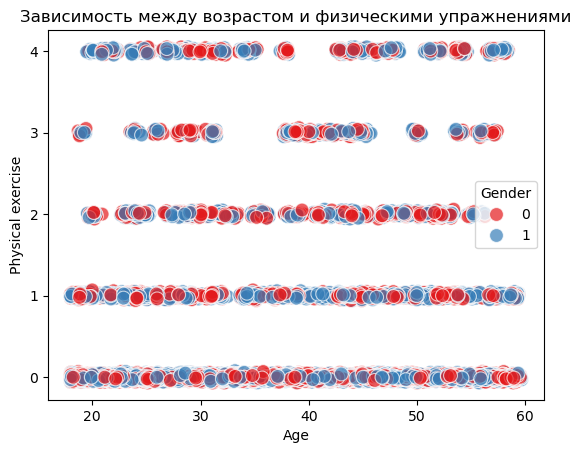

In [45]:
sb.scatterplot(x='Age', y='Physical exercise', hue='Gender', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Зависимость между возрастом и физическими упражнениями')

### Точечная диаграмма зависимости траты калорий за 30 минут и физ.упражнениями

Text(0.5, 1.0, 'Зависимость между затратами калорий за 30 минут и физическими упражнениями')

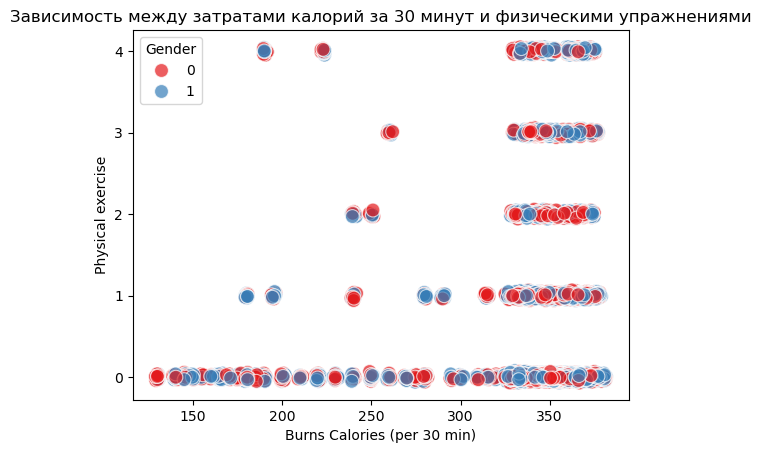

In [49]:
sb.scatterplot(x='Burns Calories (per 30 min)', y='Physical exercise', hue='Gender', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Зависимость между затратами калорий за 30 минут и физическими упражнениями')

### Точечная диаграмма зависимости ежедневного потребления белков и калориев

Text(0.5, 1.0, 'Зависимость между ежедневным потреблением белков и калориев')

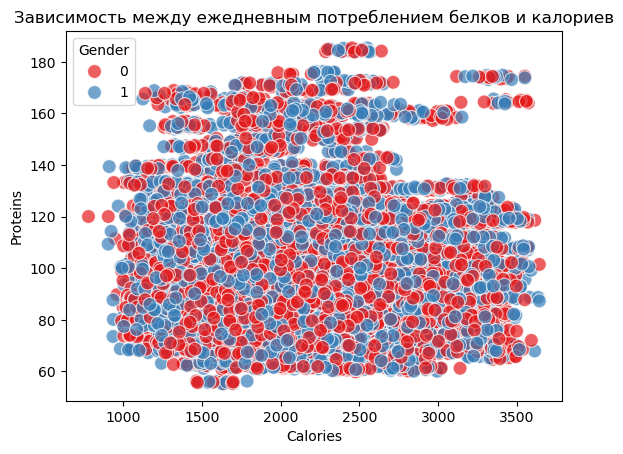

In [54]:
sb.scatterplot(x='Calories', y='Proteins', hue='Gender', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Зависимость между ежедневным потреблением белков и калориев')

# Обучение модели

In [70]:
df

,Age,Gender,Resting_BPM,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,Carbs,Proteins,Fats,Calories,Burns Calories (per 30 min),Burns Calories (per 30 min)_bc,Burns_Calories_Bin,Physical exercise
0,34.91,0,69.05,1.50,3.99,2.01,267.68,106.05,71.63,1806.0,342.58,7.260425e+19,0,0.01
1,23.37,1,73.18,1.90,4.00,2.01,214.32,85.41,56.97,1577.0,357.16,1.020506e+20,1,0.97
2,33.20,1,54.96,1.88,2.99,1.02,246.04,98.11,65.48,1608.0,359.63,1.079607e+20,1,-0.02
3,38.69,1,50.07,2.50,3.99,1.99,203.22,80.84,54.56,2657.0,351.65,8.987921e+19,1,0.04
4,45.09,0,70.84,2.91,4.00,2.00,332.79,133.05,88.43,1470.0,329.36,5.264685e+19,2,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,1,63.72,2.99,3.02,1.00,235.35,93.87,62.88,2627.0,346.27,7.924402e+19,0,0.00
19996,40.38,1,54.04,3.52,5.01,2.99,149.77,60.72,40.39,2477.0,332.64,5.708474e+19,2,-0.03
19997,50.31,0,61.65,2.81,4.02,2.00,243.61,97.29,64.91,1425.0,352.19,9.101285e+19,1,-0.01
19998,52.36,0,60.88,1.59,3.02,1.00,240.16,97.05,63.63,1276.0,329.22,5.246436e+19,2,1.00


In [96]:
x = df[df.columns[:-1]]

In [97]:
y = df["Physical exercise"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()

In [116]:
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)

In [124]:
model.score(X_test, y_pred)

0.9979385320318258